<a href="https://colab.research.google.com/github/rajatgermany/data/blob/master/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive




*   Will analzyse  user and business dataset



In [0]:
% matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [0]:
# PLot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

**Load User Business and Review data set**

In [0]:

df_user = pd.read_csv('gdrive/My Drive/Colab Notebooks/dataexploration/yelp/yelp_user.csv')
df_business = pd.read_csv('gdrive/My Drive/Colab Notebooks/dataexploration/yelp/yelp_business.csv')


In [0]:
# 90000 Rows because dataset is very big
df_review = pd.read_csv('gdrive/My Drive/Colab Notebooks/dataexploration/yelp/yelp_review.csv', nrows = 90000)
 

In [6]:
# See how data looks like
df_user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df_user.shape

(1326100, 22)

In [8]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
user_id               1326100 non-null object
name                  1325603 non-null object
review_count          1326100 non-null int64
yelping_since         1326100 non-null object
friends               1326100 non-null object
useful                1326100 non-null int64
funny                 1326100 non-null int64
cool                  1326100 non-null int64
fans                  1326100 non-null int64
elite                 1326100 non-null object
average_stars         1326100 non-null float64
compliment_hot        1326100 non-null int64
compliment_more       1326100 non-null int64
compliment_profile    1326100 non-null int64
compliment_cute       1326100 non-null int64
compliment_list       1326100 non-null int64
compliment_note       1326100 non-null int64
compliment_plain      1326100 non-null int64
compliment_cool       1326100 non-null int64
compliment_funny      132

In [9]:
# See how many are categorical
len(df_user.select_dtypes(include = 'object').columns)

5

In [10]:
# check the duplicate rows 
df_user[df_user.duplicated()].shape


(0, 22)

In [11]:
df_user.name.isnull().sum()

497

**Data Preprocessing**

In [0]:
# Computed the numnber of years user is with yelp

year_start_date = pd.to_datetime('20190101', format='%Y-%m-%d', errors='ignore')
df_user['yelping_since'] = pd.to_datetime(df_user.yelping_since)
df_user['yelping_years'] =  year_start_date - df_user.yelping_since
days = df_user['yelping_years'].astype('timedelta64[Y]')
df_user['yelping_years'] = df_user['yelping_years']/ np.timedelta64(1, 'Y')

In [0]:
# Computed number of friends for the user
df_user['friends'] = df_user.friends.apply(lambda x : 0 if x == None else len(x.split(',')) )


In [0]:
# Computed number of times user is been elite
df_user['number_of_elite_years'] = df_user.elite.apply(lambda x : 0 if x == 'None' else len(x.split(',')))


In [0]:
df_user.drop('yelping_since', axis =1 , inplace = True)


In [16]:
df_user.head()

,user_id,name,review_count,friends,useful,funny,cool,fans,elite,average_stars,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_years,number_of_elite_years
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,79,0,0,0,0,None,3.70,...,0,0,0,0,0,0,0,0,5.270471,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,1,0,0,0,0,None,2.00,...,0,0,0,0,0,0,0,0,1.834398,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,1,0,0,0,0,None,4.67,...,0,0,0,0,0,0,0,0,3.805691,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,1,0,0,0,0,None,4.67,...,0,0,0,0,0,0,0,0,2.313531,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,1,4,0,0,0,None,3.45,...,0,0,0,0,0,0,1,0,6.461461,0


**Business Data set**

In [17]:
df_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [18]:
df_business.shape

(174567, 13)

In [19]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [20]:
# check the duplicate rows 
df_business[df_business.duplicated()].shape

(0, 13)

In [21]:
# missing values in the neighbourhood
df_business.neighborhood.isnull().sum()

106552

# Story So Far

**User**


1.    Total records 1326100, with 22 features
2.    5 are categorical 17 are numerical
3.    Feature name has missing values **497**
4.    NO duplicate values
5.   Computed number_of_friends, number_of_yelping_years and number_of_elite_years


**Businesss**

1.    Total records 174567,  with 13 features
2.    8 are categorical 5 are numerical
3.    Feature neighbourhood has missing values
4.    NO Duplicate values **106552**
 


In [22]:
len(df_business.select_dtypes(include = 'object').columns)

8

# Data Visualization

## User

I will try to find the answers to thre follwoing questions
1. Oldest Users
2. Users with maximum reviews
3. Most funny users
4. Most Cool Users
5. User with most useful comments


**Oldest Users**

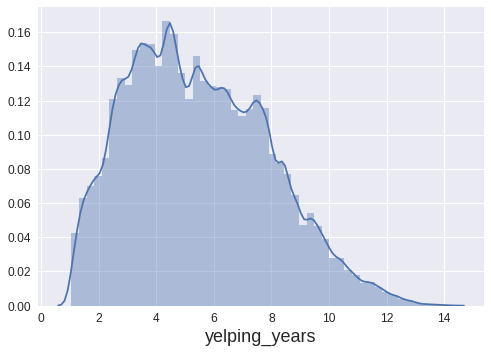

In [22]:
sns.distplot(df_user.yelping_years)

Very close to be the Guassian distribution
1. Major of the users are yelping between year 3 to 7
2. Lets find the users who has spend more then 10 yearrs yelping

In [91]:
df_user[df_user.yelping_years >10].shape

(55802, 24)

1. Ah lot of people are with yelp from long time
2. Lets find more old people

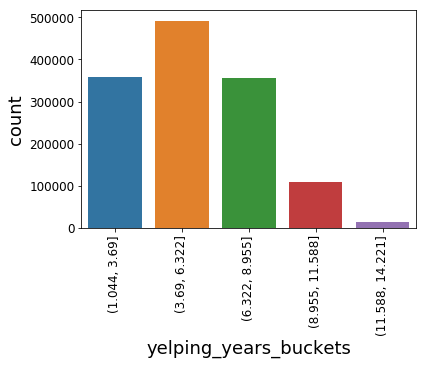

In [9]:
df_user['yelping_years_buckets'] = pd.cut(df_user.yelping_years,  5)
sns.countplot("yelping_years_buckets", data = df_user)
plt.xticks(rotation=90);


In [93]:
df_user[df_user.yelping_years >=14].shape

(75, 24)

***So we have 75 most oldert yelpers***

# User with maximum reviews

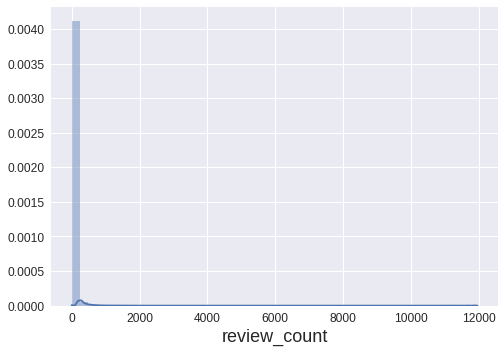

In [23]:
sns.distplot(df_user.review_count)

1. Intution - Major of the review count are less then 10 
2. Graph  is not intitutive though

In [24]:
df_user.review_count.value_counts().head(15)

1     244232
2     166170
3     125947
4      89844
5      68334
6      54448
7      44497
8      37465
9      32321
10     28455
11     25273
12     22297
13     20032
14     18290
15     16529
Name: review_count, dtype: int64

**Major of the review_counts lie between 1 to 15**

In [25]:
# users with maximum reviews
df_user[df_user.review_count >=9000].name

1091628     Shila
1126294       Kim
1308091    Victor
Name: name, dtype: object

# Most funny users

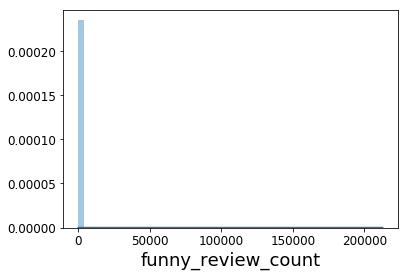

In [74]:
sns.distplot(df_user.funny)
plt.xlabel('funny_review_count');

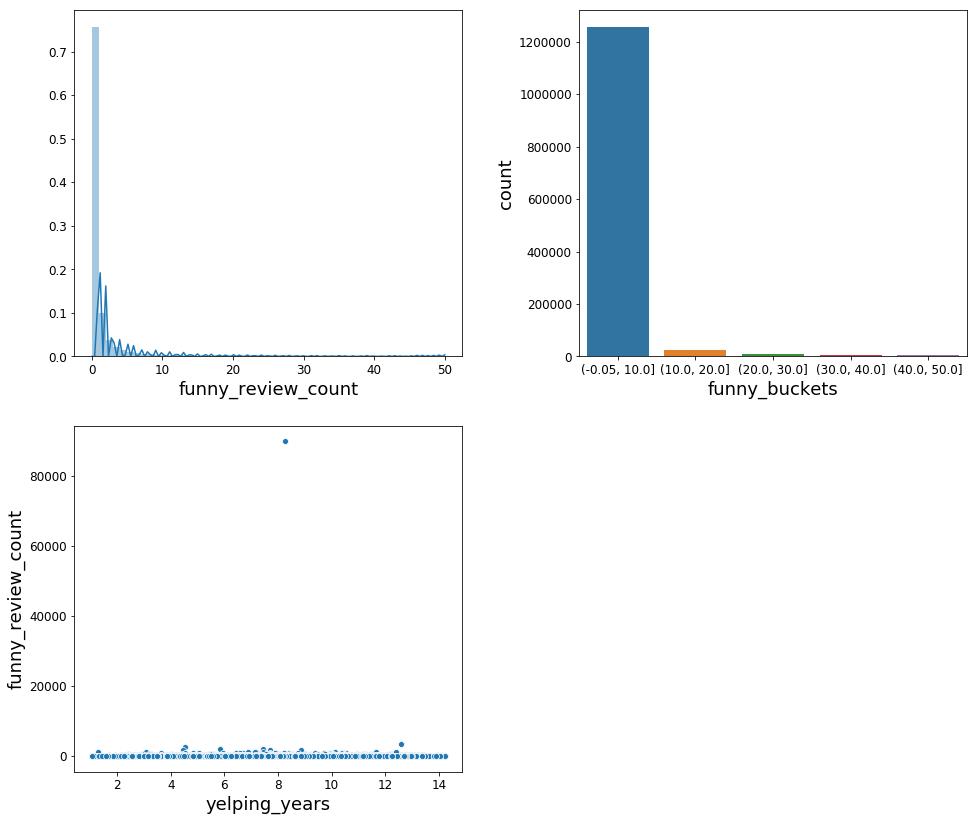

In [75]:
fig, ax = plt.subplots(2,2, figsize=(16, 14))
plt.subplots_adjust(wspace=0.3)

maximum_funny_reviews = list((df_user.funny.value_counts() > 1000).head(50).index)
filtering = df_user["funny"].isin(maximum_funny_reviews) 
  
df_maximum_funny_reviews = df_user[filtering]
df_maximum_funny_reviews['funny_reviews_buckets'] = pd.cut(df_maximum_funny_reviews.funny, 5)

sns.countplot(df_maximum_funny_reviews.funny_buckets, ax = ax[0][1])
sns.distplot(df_maximum_funny_reviews.funny,  ax = ax[0][0])
ax[0][0].set_xlabel('funny_review_count')
sns.scatterplot('yelping_years', 'funny', data = df_maximum_cool_reviews, ax = ax[1][0])

ax[1][0].set_ylabel('funny_review_count')
ax[1][1].set_visible(False)

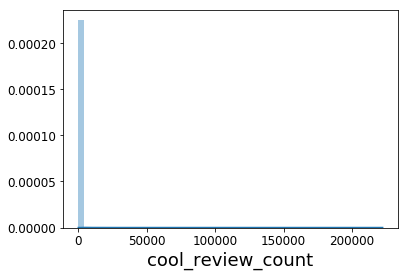

In [71]:
sns.distplot(df_user.cool)
plt.xlabel('cool_review_count');

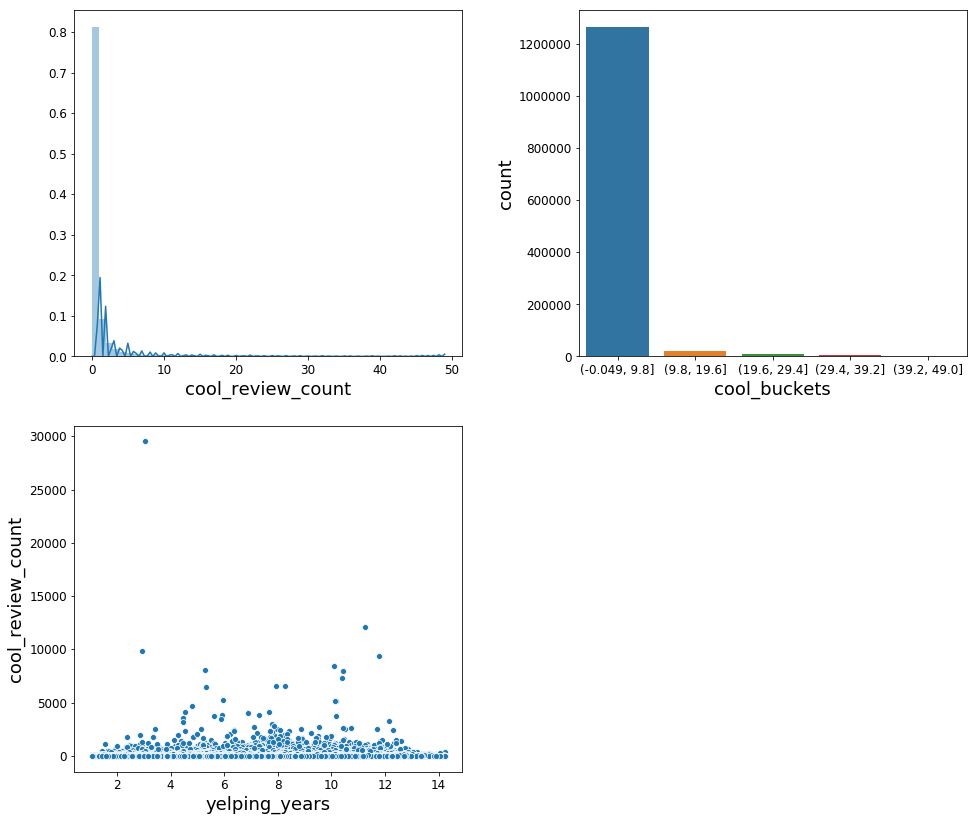

In [73]:
fig, ax = plt.subplots(2,2, figsize=(16, 14))
plt.subplots_adjust(wspace=0.3)

maximum_cool_reviews = list((df_user.cool.value_counts() > 1000).head(50).index)
filtering = df_user["cool"].isin(maximum_cool_reviews) 
  
df_maximum_cool_reviews = df_user[filtering]
df_maximum_cool_reviews['cool_buckets'] = pd.cut(df_maximum_cool_reviews.cool, 5)

sns.countplot(df_maximum_cool_reviews.cool_buckets, ax = ax[0][1])
sns.distplot(df_maximum_cool_reviews.cool,  ax = ax[0][0])
ax[0][0].set_xlabel('cool_review_count')
sns.scatterplot('yelping_years', 'useful', data = df_maximum_cool_reviews, ax = ax[1][0])

ax[1][0].set_ylabel('cool_review_count')
ax[1][1].set_visible(False)

**Useful reviews**

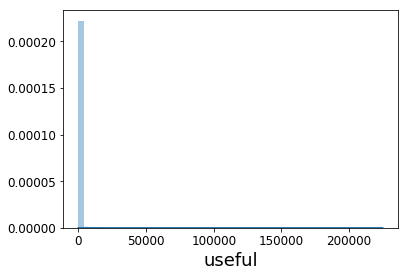

In [22]:
sns.distplot(df_user.useful)
plt.xlabel('cool_review_count');


**Not much intutive **

Lets analyze the maximum useful reviews

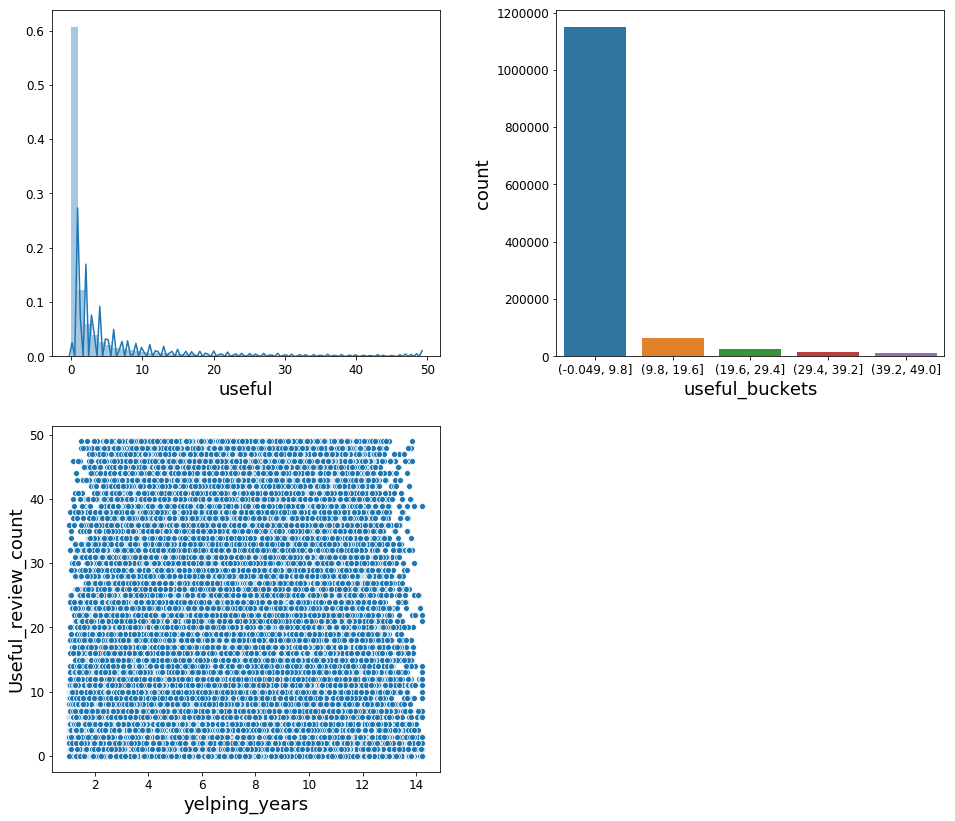

In [66]:
fig, ax = plt.subplots(2,2, figsize=(16, 14))
plt.subplots_adjust(wspace=0.3)

maximum_useful_reviews = list((df_user.useful.value_counts() > 1000).head(50).index)
filtering = df_user["useful"].isin(maximum_useful_reviews) 
  
df_maximum_useful_reviews = df_user[filtering]
df_maximum_useful_reviews['useful_buckets'] = pd.cut(df_maximum_useful_reviews.useful, 5)

sns.countplot(df_maximum_useful_reviews.useful_buckets, ax = ax[0][1])
sns.distplot(df_maximum_useful_reviews.useful,  ax = ax[0][0])
sns.scatterplot('yelping_years', 'useful', data = df_maximum_useful_reviews, ax = ax[1][0])

ax[1][0].set_ylabel('Useful_review_count')
ax[1][1].set_visible(False)

**Finding**

1. Most of the  people  at max write less then 10 useful reviews

2. Useful reviews count fdoes not 

**Average Stars**

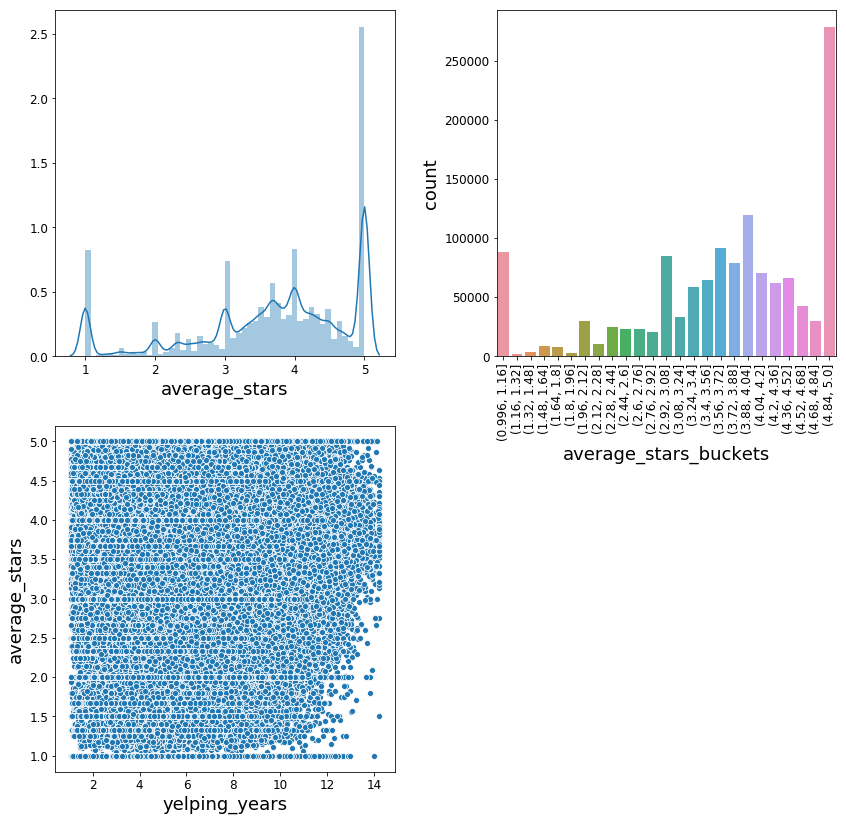

In [64]:
from scipy.stats import norm
fig, ax = plt.subplots(2,2, figsize=(14, 14))
plt.subplots_adjust(wspace=0.3)

df_user['average_stars_buckets'] = pd.cut(df_user.average_stars, 25)

sns.distplot(df_user.average_stars,  ax = ax[0][0])
sns.countplot(df_user.average_stars_buckets, ax = ax[0][1])
sns.scatterplot('yelping_years', 'average_stars', data = df_user, ax = ax[1][0])
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=90);
ax[1][1].set_visible(False)


Findings
1. 5 star predominates
2. Old or young no difference between them while giving the stars

# Business

In [24]:
df_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


# Recipie for being the successful business




In [25]:
#How business are rated
df_business.stars.unique()

array([4. , 3. , 1.5, 3.5, 5. , 4.5, 2. , 2.5, 1. ])

**So 5 is the maximum star to rate a top business  To start with lets choose ourself a five rated business **

In [0]:
five_star_business = df_business[df_business.stars == 5]

In [55]:
#How many are 5 rated business
five_star_business.shape[0]

27540

Thats a big number...Lets analyze what is the safest best to choose the five star rated business




In [56]:
five_star_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automotive;Auto Detailing
11,Y0eMNa5C-YU1RQOZf9XvVA,"""CubeSmart Self Storage""",NaN,"""2414 South Gilbert Road""",Chandler,AZ,85286,33.271720,-111.791257,5.0,23,1,Local Services;Self Storage
18,0FMKDOU8TJT1x87OKYGDTg,"""Senior's Barber Shop""",NaN,"""13375 W McDowell""",Goodyear,AZ,85395,33.463629,-112.347038,5.0,65,1,Barbers;Beauty & Spas
30,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",NaN,"""2777 Steeles Avenue W""",Toronto,ON,M3J 3K5,43.781816,-79.490433,5.0,3,1,Restaurants;Breakfast & Brunch


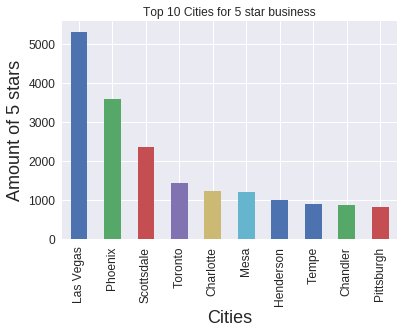

In [80]:
#which city has the maximum five star business
five_star_business.city.value_counts().head(10).plot('bar')
plt.xlabel('Cities')
plt.ylabel('Amount of 5 stars')
plt.title('Top 10 Cities for 5 star business');


**Las Vegas and Phoneix seems to be safe bet**

** Lets check the propotion for the five star business Categories**





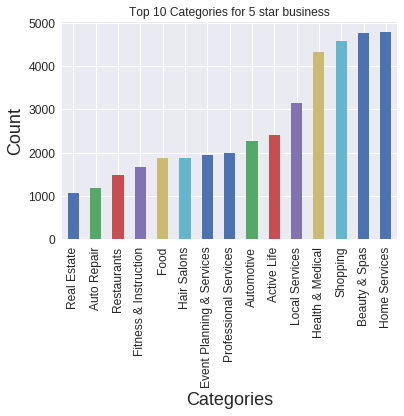

In [81]:
Categories = dict()
for cat in five_star_business.categories.values:
    all_categories= cat.split(";")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1


Categories_for_five_star_business = pd.Series(  list(Categories.values()), index = list(Categories.keys())                )
Categories_for_five_star_business.sort_values().tail(15).plot('bar')

plt.xlabel('Categories')
plt.ylabel('Count');
plt.title('Top 10 Categories for 5 star business');

**Its best to choose something from Home Services Beauty and Spas**

**Lets check the location to setup up business**

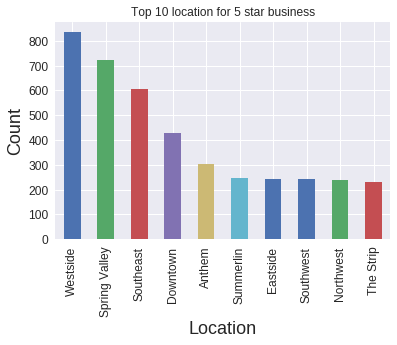

In [82]:
five_star_business.neighborhood.value_counts().head(10).plot('bar')
plt.xlabel('Location')
plt.ylabel('Count');
plt.title('Top 10 location for 5 star business');

**Westside and Spring Valley seems to be good opition**

**Reviews are the good popularity. There is nothing like bad popularity. Lets check which category is  reviewd maximum times**

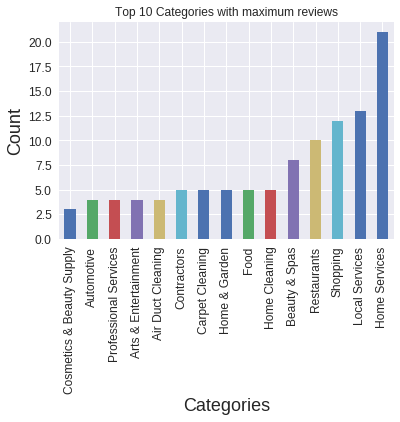

In [83]:
five_star_business_with_max_reviews = five_star_business.sort_values(by=['review_count'], ascending = False).head(50)

Categories = dict()
for cat in five_star_business_with_max_reviews.categories.values:
    all_categories= cat.split(";")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1


Categories_for_top_five_star_business = pd.Series(  list(Categories.values()), index = list(Categories.keys())                )
Categories_for_top_five_star_business.sort_values().tail(15).plot('bar')

plt.xlabel('Categories')
plt.ylabel('Count');
plt.title('Top 10 Categories with maximum reviews');


**Lets check which category for five-star business is reviewd most postively**

**Merging with the review dataset to get the gist of the reviews**

In [85]:
five_star_business = pd.merge(df_review, right = five_star_business, how = 'inner', on = 'business_id')
five_star_business.head()

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories
0,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0,"""My Dog Spot""",...,"""911 Pape Avenue""",Toronto,ON,M4K 3V1,43.685080,-79.347031,5.0,3,1,Pet Groomers;Pet Services;Pets
1,hkyyWaX-EMiIkvyu1zOBlA,nsOf58RZjMTn8V94EQYJog,djyIZW8gVNWby8wauISkqg,5,2017-08-23,Suzanne was able to get my business five T.V. ...,0,0,0,"""Jameson & Associates""",...,"""2320 E Baseline Rd, Ste 148-281""",Phoenix,AZ,85042,33.377946,-112.032183,5.0,4,1,Professional Services;Public Relations;Marketing
2,423YyWSUKTfDrgl70p585w,6cYXyJE-qAR0injjjEcHfA,o_RlSv2vCeUxUuByv7TX7A,5,2016-05-20,I called 1st Call Garage Doors to repair my ga...,1,0,0,"""1st Call Garage Doors Repair And Service""",...,"""""",Las Vegas,NV,89144,36.178011,-115.313391,5.0,122,1,Home Services;Fences & Gates;Garage Door Servi...
3,p2_z7Lp_cviovDZiDRIC9g,Dh-Le9sz5G0s25AGsSq7Nw,o_RlSv2vCeUxUuByv7TX7A,5,2017-05-16,Very very happy with the service I received as...,0,0,0,"""1st Call Garage Doors Repair And Service""",...,"""""",Las Vegas,NV,89144,36.178011,-115.313391,5.0,122,1,Home Services;Fences & Gates;Garage Door Servi...
4,ijc_SC7AoWamrvnOoODBwg,kQslJ4kPP2wadarorZP6BQ,o_RlSv2vCeUxUuByv7TX7A,5,2016-12-07,Excellent service. Our garage door was not op...,1,0,1,"""1st Call Garage Doors Repair And Service""",...,"""""",Las Vegas,NV,89144,36.178011,-115.313391,5.0,122,1,Home Services;Fences & Gates;Garage Door Servi...


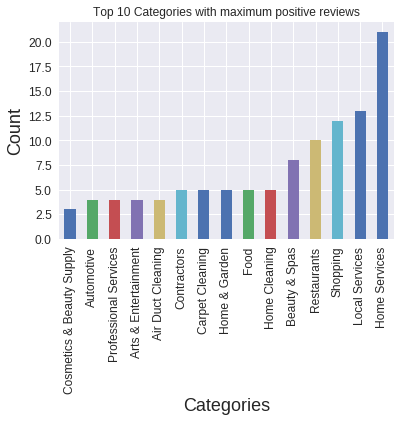

In [87]:
five_star_business_with_max_postive_reviews = five_star_business.sort_values(by=['stars_x'], ascending = False).head(50)

Categories = dict()
for cat in five_star_business_with_max_reviews.categories.values:
    all_categories= cat.split(";")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1


Categories_for_five_star_business = pd.Series(  list(Categories.values()), index = list(Categories.keys())                )
Categories_for_five_star_business.sort_values().tail(15).plot('bar')

plt.xlabel('Categories')
plt.ylabel('Count');
plt.title('Top 10 Categories with maximum positive reviews');

**So lets open a home service business in Las Vegas or the Phoneix in the westside region.**

**But before them and see how the present Home services business  in the city are reviewd by people**

In [0]:
filtering_condition = five_star_business.city == 'Las Vegas' 
five_star_business_in_lasvegsas =  five_star_business[filtering_condition]

In [0]:
# filteting out the Home Services Category
def isHomeService(x):
  all_categories= x.split(";")
  if 'Home Services' in all_categories:
    return 1
  return 0
    
    
five_star_business_in_lasvegsas['isHomeService'] = five_star_business_in_lasvegsas.categories.apply(isHomeService);

In [39]:
five_star_business_in_lasvegsas[five_star_business_in_lasvegsas.isHomeService == 1].head(5)

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories,isHomeService
2,423YyWSUKTfDrgl70p585w,6cYXyJE-qAR0injjjEcHfA,o_RlSv2vCeUxUuByv7TX7A,5,2016-05-20,I called 1st Call Garage Doors to repair my ga...,1,0,0,"""1st Call Garage Doors Repair And Service""",...,Las Vegas,NV,89144,36.178011,-115.313391,5.0,122,1,Home Services;Fences & Gates;Garage Door Servi...,1
3,p2_z7Lp_cviovDZiDRIC9g,Dh-Le9sz5G0s25AGsSq7Nw,o_RlSv2vCeUxUuByv7TX7A,5,2017-05-16,Very very happy with the service I received as...,0,0,0,"""1st Call Garage Doors Repair And Service""",...,Las Vegas,NV,89144,36.178011,-115.313391,5.0,122,1,Home Services;Fences & Gates;Garage Door Servi...,1
4,ijc_SC7AoWamrvnOoODBwg,kQslJ4kPP2wadarorZP6BQ,o_RlSv2vCeUxUuByv7TX7A,5,2016-12-07,Excellent service. Our garage door was not op...,1,0,1,"""1st Call Garage Doors Repair And Service""",...,Las Vegas,NV,89144,36.178011,-115.313391,5.0,122,1,Home Services;Fences & Gates;Garage Door Servi...,1
87,zQhjtvB1-9shO8lFTL_B3w,SulvRssUN5NpqGCjbcbFFg,KvlUpU-CoGwndwJYEcMZVw,5,2016-02-20,"If you are looking for a home in Las Vegas, th...",0,0,0,"""Igal Ben Yair - IVegasRealtor - Xpand Realty""",...,Las Vegas,NV,89118,36.082052,-115.243265,5.0,9,1,Real Estate Agents;Commercial Real Estate;Home...,1
102,SoXnWWcLN8TuGszHjRBYrg,CZs1Eq7t1fqpXV1yox-CVg,YNzlzVXYN85sjlGqWTbMKg,5,2016-01-19,Have used Richard a number of times for variou...,2,0,0,"""Fix My AC""",...,Las Vegas,NV,89115,36.276581,-115.031241,5.0,6,1,Home Services;Heating & Air Conditioning/HVAC,1


# Sentiment Analysis

Here we will perform the sentiment analysis on the reviews of the HomeService in LasVegas , And again more insight to the business needs

Example - If someone is complaining we can formulate our business to fulfill that need

# Findings

**We found the recipie to become the successful business**


1.   Choose HomeService . Its is 5 star business . Lot of people reviews about it . And It has got the most posite reviews as well . SO this shows people need this business
2.   Locate your business in the Las Vegas OR Phoneix

